<a href="https://colab.research.google.com/github/mariamatef847/amazon-reviews-sentiment-analysis/blob/main/Amazon_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Reviews.csv to Reviews.csv


In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('/content/Reviews.csv',usecols=['Id','Score','Text'],on_bad_lines='skip')

In [15]:
df=df.sample(500,random_state=42)

In [16]:
df

,Id,Score,Text
165256,165257,5,Having tried a couple of other brands of glute...
231465,231466,5,My cat loves these treats. If ever I can't fin...
427827,427828,3,A little less than I expected. It tends to ha...
433954,433955,2,"First there was Frosted Mini-Wheats, in origin..."
70260,70261,5,and I want to congratulate the graphic artist ...
...,...,...,...
240527,240528,5,Xylitol looks and acts so much more like real ...
401661,401662,5,My grandpa used to tell stories about eating t...
321502,321503,5,"Very smooth, never bitter. Wonderful for me be..."
163040,163041,4,"I really like this tea, but the bags are packe..."


In [17]:
import re
import nltk

In [18]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [20]:
stopwords_set=set(stopwords.words('english'))

In [21]:
stopwords_set

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [111]:

def clean_txt(text):
  text=text.lower()
  text = re.sub(r'<.*?>', ' ', text)
  text=re.sub(r'[^a-z\s]',' ',text)
  tokens=word_tokenize(text)
  tokens=[i for i in tokens if i not in stopwords_set]
  return ' '.join(tokens)


In [112]:
df['Cleaned_text']=df['Text'].apply(clean_txt)

In [113]:
from textblob import TextBlob

In [114]:
def sentiment(text):
  p=TextBlob(text).sentiment.polarity
  if p> 0:
    return 'Positive'
  elif p< 0:
    return 'Negative'
  else:
    return 'Neutral'

In [115]:
df['Sentiment']=df['Cleaned_text'].apply(sentiment)

In [116]:
df

,Id,Score,Text,Cleaned_text,Sentiment
165256,165257,5,Having tried a couple of other brands of glute...,tried couple brands gluten free sandwich cooki...,Positive
231465,231466,5,My cat loves these treats. If ever I can't fin...,cat loves treats ever find house pop top bolts...,Positive
427827,427828,3,A little less than I expected. It tends to ha...,little less expected tends muddy taste expecte...,Negative
433954,433955,2,"First there was Frosted Mini-Wheats, in origin...",first frosted mini wheats original size froste...,Positive
70260,70261,5,and I want to congratulate the graphic artist ...,want congratulate graphic artist putting entir...,Positive
...,...,...,...,...,...
240527,240528,5,Xylitol looks and acts so much more like real ...,xylitol looks acts much like real sugar altern...,Positive
401661,401662,5,My grandpa used to tell stories about eating t...,grandpa used tell stories eating stuff army da...,Positive
321502,321503,5,"Very smooth, never bitter. Wonderful for me be...",smooth never bitter wonderful low acid coffee ...,Positive
163040,163041,4,"I really like this tea, but the bags are packe...",really like tea bags packed tightly hot water ...,Positive


In [104]:
!pip install wordcloud

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 362, in run
    resolver = self.make_resolver(
               ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 177, in make_resolver
    return pip._internal.resolution.resolvelib.resolver.Resolver(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 58, in __init__
    self.factory = Factory(
                   ^^^^^^^^
  File "/usr/local/lib/py

In [117]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

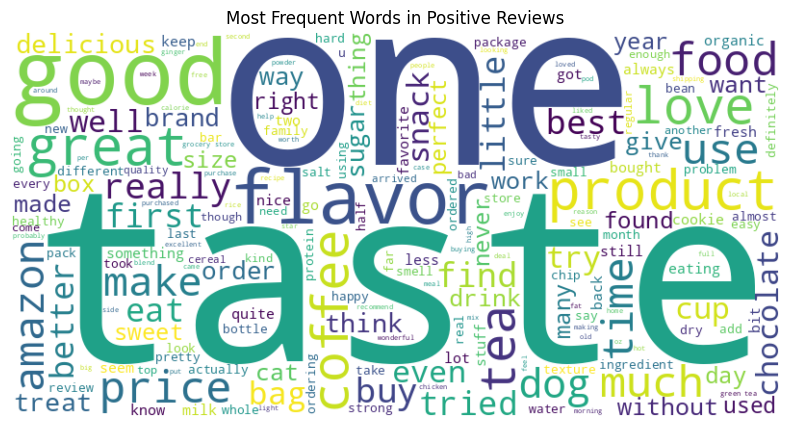

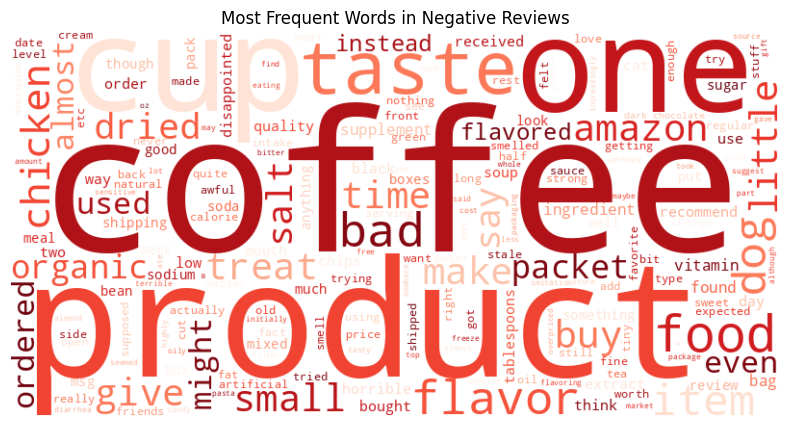

In [118]:
# WordCloud for Positive Reviews
positive_text = " ".join(df[df['Sentiment'] == 'Positive']['Cleaned_text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Positive Reviews")
plt.show()

# WordCloud for Negative Reviews
negative_text = " ".join(df[df['Sentiment'] == 'Negative']['Cleaned_text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Negative Reviews")
plt.show()

In [107]:
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,442
Negative,49
Neutral,9


/tmp/ipython-input-2181662583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


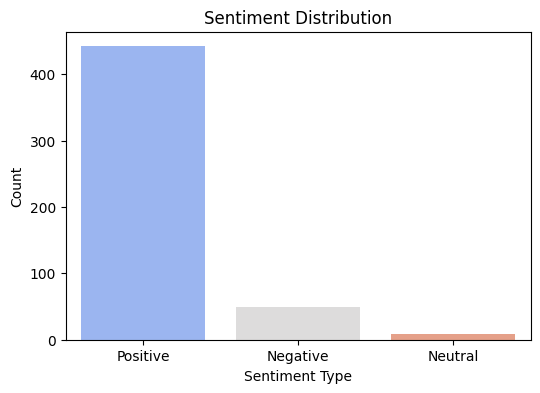

In [109]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.show()

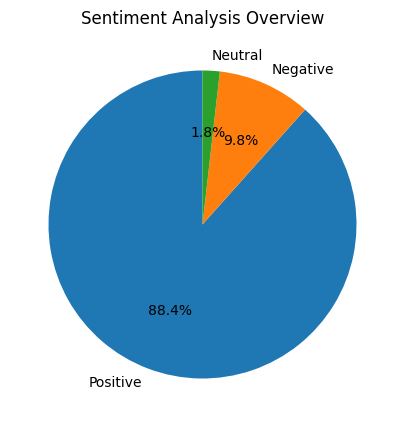

In [110]:
sent_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(sent_counts, labels=sent_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Analysis Overview")
plt.show()